# Student Performance Indicator

## Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('data/stud.csv')

## Show Top 5 Records

In [20]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [21]:
df.shape

(1000, 8)

# Statistical Summmary of the Dataset

In [22]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 2 Dataset Information

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- The dataset have 1000 records
- There are 8 columns in the dataset in which three(3) are integer and 5 are object(string)
- int columns are: math_score, reading_score, writing_score
- obj columns are: gender, parental_level_of_edcuation, lunch and test_preparation_course


## 3 Data Checkes to perform
- Checking Missing values
- Checking Duplicates
- Checking Data Type
- Checking the number of unique values of each column
- Check statistics of dataset
- Checking various categories present in the d/f categorical column

### 3.1 Cheing missing values

In [24]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

### 3.2 Checking Duplicates

In [25]:
df.duplicated().sum()

np.int64(0)

- There is no duplicates in the dataset

### 3.3 Checking Data types

In [26]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

- There are three integer and five object columns

### 3.4 Checking the number of Uniqu values in each column

In [27]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 4 Exploring Data

In [ ]:
print(f"Categorie in 'gender' variable: {df['gender'].unique()} \n")
print(f"Categories in 'race/ethnicity' variable: \n {df['race_ethnicity'].unique()} \n ")
print(f"Categories in 'parental level of education' variable: \n {df['parental_level_of_education'].unique()} \n")
print(f"Categories in 'lunch' variable: {df['lunch'].unique()} \n")
print(f"Categories in 'test preparation course' variable: {df['test_preparation_course'].unique()}")

Categorie in 'gender' variable: ['female' 'male'] 

Categories in 'race/ethnicity' variable: 
 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race_ethnicity, Length: 1000, dtype: object 
 
Categories in 'parental level of education' variable: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable: ['standard' 'free/reduced'] 

Categories in 'test preparation course' variable: ['none' 'completed']


=

# Define Numerical and Categorical Features

In [29]:
# numerical_features = df.select_dtypes(exclude='O') # this will give numerical features along with there value i.e a numerical df

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O'] # this code give list of  numerical features with names only not values of it
print(f"We have {len(numerical_features)} numerical features: {numerical_features}")

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"We have {len(categorical_features)} categorical featureas: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical featureas: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding Columns for "Total Score" and "Average"

In [30]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full = df[df['reading_score'] == 100]['average'].count() # or reading_full =len(df[df['reading_score']==100])
writing_full = len(df[df['writing_score'] == 100])
math_full = len(df[df['math_score'] == 100])
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in Maths: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in Maths: 7


In [32]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = len(df[df['writing_score'] <= 20])
math_less_20 = len(df[df['math_score'] <= 20])

print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")
print(f"Number of students with less 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less 20 marks in Maths: {math_less_20}")

Number of students with less than 20 marks in Reading: 1
Number of students with less 20 marks in Writing: 3
Number of students with less 20 marks in Maths: 4


#### Insight
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

# Exploring Data with Visualization

## 4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

## 4.1 Histogram & KDE

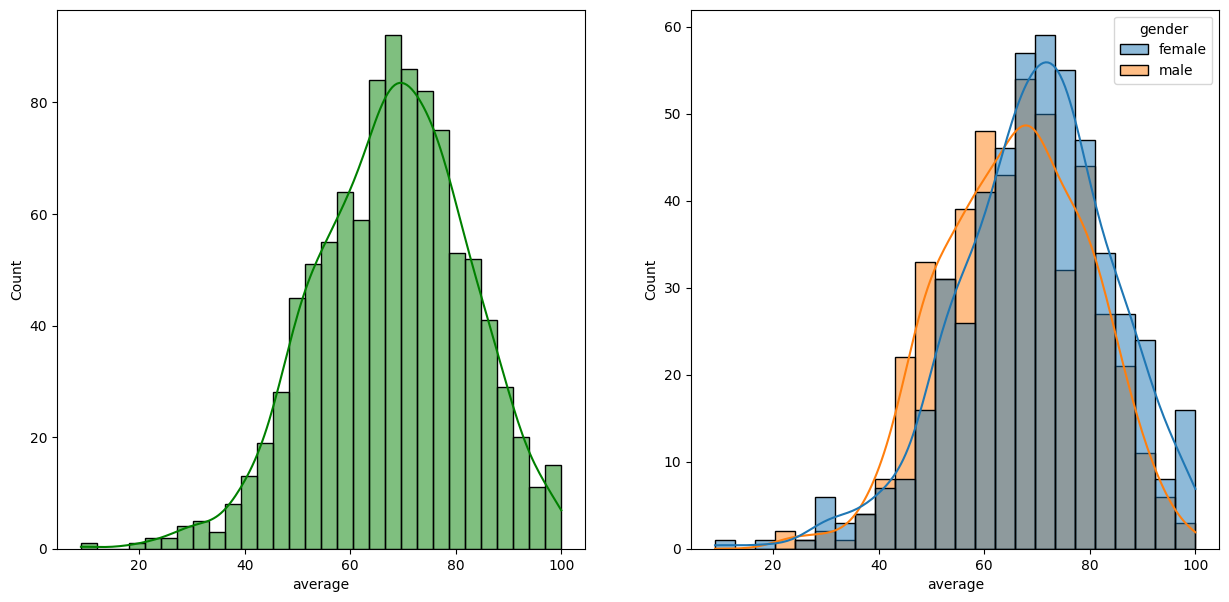

In [33]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121) # plt.subplot(1,2,1) # row_no, column_no , index_no
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122) # plt.subplot(1,2,2)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()